# IRIS - Connection II

![Add layer](https://github.com/DrKAI/image/blob/main/Add%20Layer.png?raw=true)

In [26]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기
* iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [27]:
iris = load_iris()

x = iris.data
y = iris.target

In [28]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.1, random_state=2022)

In [31]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((135, 4), (135,), (15, 4), (15,))

## **sepal끼리, petal끼리**

In [32]:
train_x_s = train_x.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
train_x_p = train_x.loc[:, ['petal length (cm)', 'petal width (cm)']]

In [33]:
test_x_s = test_x.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
test_x_p = test_x.loc[:, ['petal length (cm)', 'petal width (cm)']]

In [34]:
train_x_s.shape, train_x_p.shape

((135, 2), (135, 2))

## One-hot Encoding

In [35]:
from tensorflow.keras.utils import to_categorical, plot_model

train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)

## Modeling : multi-input & Add layer

In [36]:
from keras.layers import *

In [37]:
keras.backend.clear_session()

sepal = Input(shape=(2,))
x1 = Dense(4, activation='relu')(sepal)

petal = Input(shape=(2,))
x2 = Dense(4, activation='relu')(petal)

x = Add()([x1, x2])
outputs = Dense(3, activation='softmax')(x)

model = keras.models.Model([sepal, petal], outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 4)            12          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            12          ['input_2[0][0]']                
                                                                                              

## 모델 시각화

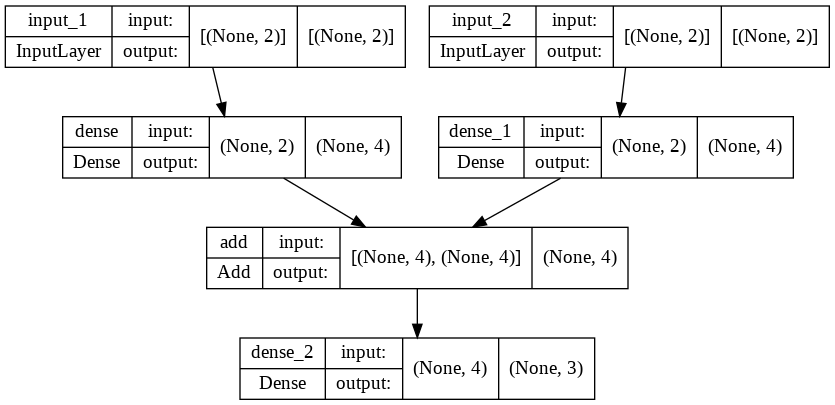

In [38]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, restore_best_weights=True)

In [40]:
model.fit([train_x_s, train_x_p], train_y, epochs=100, validation_data=([test_x_s, test_x_p], test_y), callbacks=[es], verbose=1)

Epoch 1/100
5/5 [==============================] - 2s 172ms/step - loss: 3.7765 - accuracy: 0.3259 - val_loss: 3.3909 - val_accuracy: 0.4000
Epoch 2/100
5/5 [==============================] - 0s 34ms/step - loss: 3.6684 - accuracy: 0.3259 - val_loss: 3.2985 - val_accuracy: 0.4000
Epoch 3/100
5/5 [==============================] - 0s 17ms/step - loss: 3.5710 - accuracy: 0.3259 - val_loss: 3.2067 - val_accuracy: 0.4000
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 3.4690 - accuracy: 0.3259 - val_loss: 3.1177 - val_accuracy: 0.4000
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 3.3710 - accuracy: 0.3259 - val_loss: 3.0302 - val_accuracy: 0.4000
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 3.2770 - accuracy: 0.3259 - val_loss: 2.9448 - val_accuracy: 0.4000
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 3.1837 - accuracy: 0.3259 - val_loss: 2.8615 - val_accuracy: 0.4000
Epoch 8/100
5/5 [======